In [1]:
%run My_function.ipynb

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
print ("Librairies utilisées :")
print ("Pandas :", pd.__version__)
print ("Numpy :", np.__version__)
print ("Seaborn :", sns.__version__)

Librairies utilisées :
Pandas : 1.4.4
Numpy : 1.21.5
Seaborn : 0.11.2


# Introduction

<div class="oc-richContent root-0-2-1" data-videotitle="video" data-current-user-id="328418" data-project-id="862" data-codio-button-label="Accéder au code"><p>&nbsp;</p>

<p style="text-align:center;">Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.</p>
<p><img src="https://user.oc-static.com/upload/2020/11/24/16062164030098_image2.png" alt=""></p>
<p>&nbsp;</p>
<p>L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !</p>
<p>Votre manager, Patrick, vous briefe par un e-mail :</p><br/>
<div class="oc-tableContainer"><table>
<tbody>
<tr>
<td style="text-align:left;"><strong>De</strong> : Patrick<br><strong>À </strong>: Moi<br><strong>Objet</strong> : Lancement mission data international</td>
</tr>
<tr>
<td style="font-size:13px;">
<p>Salut !</p>
<p>Comme on en a déjà brièvement parlé, je te fais ce mail pour te briefer sur la mission d’analyse pour le lancement à l’international.</p>
<p>Ton objectif sera de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché.&nbsp;</p>
<p>Tu seras en totale autonomie sur ce projet, notamment sur le choix des données à analyser et même du langage à utiliser (R ou Python).&nbsp;</p>
<p>Pars des données de la FAO <em>(Food and Agriculture Organization)</em> que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en <em>open data</em> que tu souhaites sur <a href="http://www.fao.org/faostat/fr/#data/">le site de la FAO</a>.</p>
<p>Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...</p>
<p>Voici ce que j’attends de toi :</p>
<ul style="text-align:left;">
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données ;</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées ;</li>
<li>une présentation qui récapitule les points suivants :&nbsp;</li>
<ul>
<li>le contexte du projet de data analyse ;</li>
<li>votre démarche (sans entrer dans les détails mathématiques, mais en vulgarisant les sujets abordés) ;</li>
<li>vos résultats et recommandations.</li>
</ul>
</ul>
<p>&nbsp;</p>
<p>Bon courage !</p>
<p>Patrick</p>
</td>
</tr>
<tr>
<td style="text-align:left;">
<p>Pièce jointe :</p>
<ul>
<li><a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P9-data.zip">Données New Food Balances (FAO)</a></li>
</ul>
</td>
</tr>
</tbody>
</table></div>
<p>&nbsp;</p>
<p>&nbsp;Vous avez toutes les cartes en main. À vous de jouer !</p>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788716972812_Banner-Livrables.png" alt="Bannière livrables"></p>

<ol>
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données.</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées.</li>
<li>une présentation du travail réalisé (Powerpoint ou équivalent, maximum 20 slides).</li>
</ol>

</div>

In [4]:
# On importe nos données

# Fichier CSV contenant des données sur la disponibilité alimentaire par pays en 2017
df = pd.read_csv("Données/DonnéesGénérales.csv", index_col="Zone")

In [5]:
df

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Valeur US $ du PIB par habitant,Coût d'une alimentation équilibré (PPP dollar par personne par jour),Coût des aliments d'origine animale,Population totale,Population urbaine,Part de l'élevage de poulet (%),Political_Stability,distance_km
Zone,,,,,,,,,,,,,,,
Afrique du Sud,1.625052,2.800168,0.067145,4.396787,2.796739,3.738527,1.981279,-0.303250,1.679427,0.957359,0.795539,1.179845,-0.241778,-0.185472,0.852839
Albanie,-0.005784,-0.478132,-0.289646,-0.197698,-0.472500,-0.358299,-0.509646,-0.421034,1.379306,1.720469,-0.516933,-0.520768,-0.362848,0.631264,-1.111730
Algérie,-0.897031,-0.114052,-0.289646,-0.545180,-0.115646,0.283372,-0.115074,-0.450670,1.001155,0.457390,0.417029,0.817948,0.294825,-0.977458,-1.177657
Angola,-0.558399,-0.047568,-0.289646,2.109197,-0.031778,-0.259580,-0.465972,-0.451687,2.129607,0.704743,0.150249,0.318437,-0.458974,-0.247346,0.131639
Antigua-et-Barbuda,2.385417,-0.541450,-0.289646,-0.496919,-0.541568,-0.358299,-0.529224,0.375285,1.699435,-1.026727,-0.585001,-0.602666,-0.114015,1.089131,0.190841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Égypte,-0.369346,1.426163,-0.283982,0.497266,1.505817,-0.358299,1.154485,-0.603524,0.388909,1.746783,1.897728,1.385763,0.095881,-1.596198,-0.701623
Émirats arabes unis,1.768400,0.099646,0.242709,3.614952,0.127738,-0.358299,-0.456936,2.226029,-1.015654,-0.110995,-0.365844,-0.216666,0.331937,0.928259,-0.181345
Équateur,-0.028637,-0.012743,-0.289646,-0.564485,-0.016977,0.480810,-0.017184,-0.296537,-0.949627,-0.653066,-0.179608,-0.098338,0.922687,0.042992,0.934337


# Clustering

## Avec scaling, sans les outliers

In [6]:
# Colonne à supprimer pour le choix des variables
df = df.drop(["distance_km"], axis=1)

### K-means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

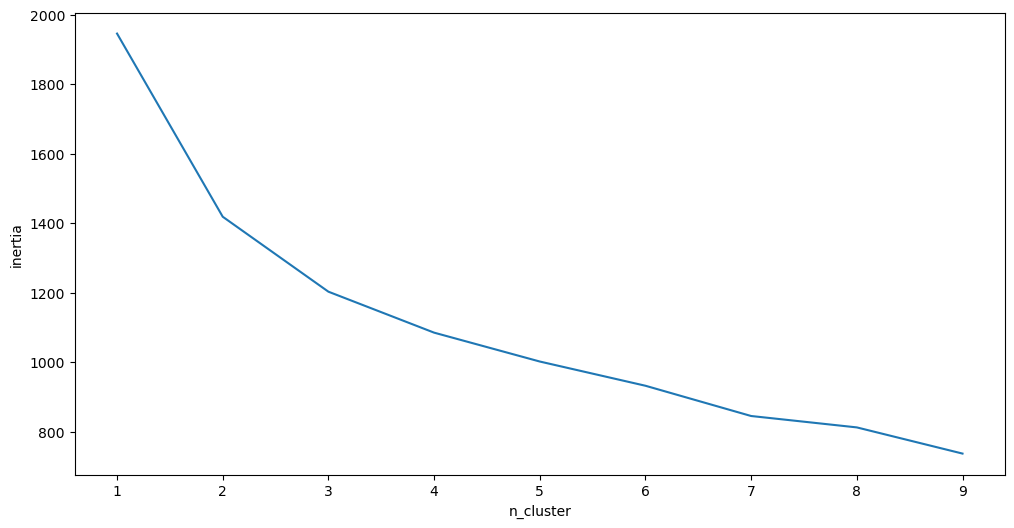

In [7]:
my_kmeans_coude(df)

### Silhouette

Le nombre optimal de cluster est : 2


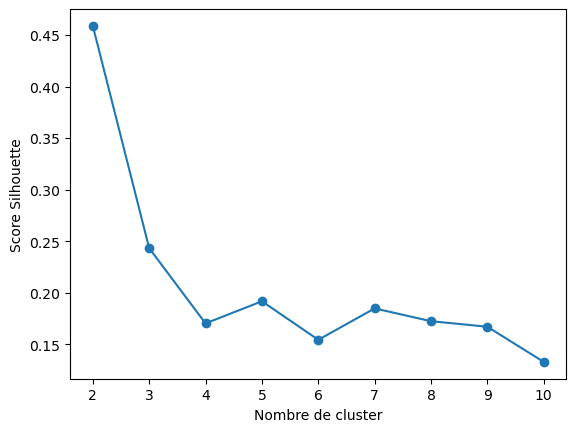

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [8]:
my_silhouette_method(df, 10)

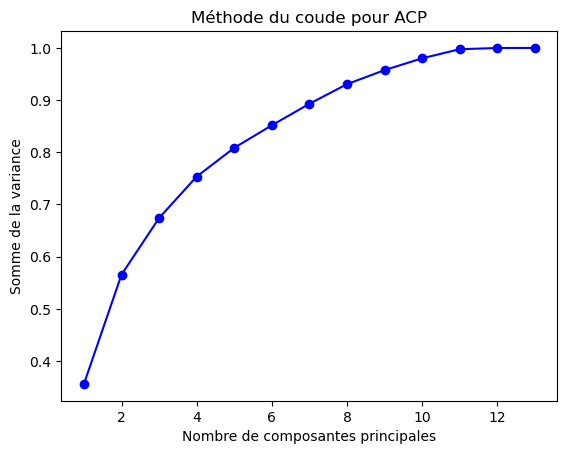

In [9]:
my_pca_coude(df)

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Valeur US $ du PIB par habitant,Coût d'une alimentation équilibré (PPP dollar par personne par jour),Coût des aliments d'origine animale,Population totale,Population urbaine,Part de l'élevage de poulet (%),Political_Stability
0,0.252263,1.521724,0.690113,0.594805,1.518194,1.483584,1.559123,-0.148541,0.104124,0.189452,1.435732,1.459745,0.260179,-0.850153
1,-0.573614,-0.395685,-0.255027,-0.324265,-0.392685,-0.262361,-0.398774,-0.387355,-0.296559,0.045342,-0.247044,-0.328247,-0.378452,-0.205850
2,0.923613,0.113893,1.132369,1.279101,0.128485,-0.358299,0.206663,2.808417,-1.221918,-1.342497,-0.267674,-0.088295,-0.543098,1.292753
3,0.714300,-0.329334,-0.209257,-0.094740,-0.328470,-0.291116,-0.352311,-0.003840,0.861453,0.198161,-0.434110,-0.395859,0.683843,0.489907
4,0.029533,4.892044,0.035997,0.531049,4.723255,2.430504,4.549763,-0.214937,0.753055,0.407393,4.416785,5.396287,1.641200,-0.544341


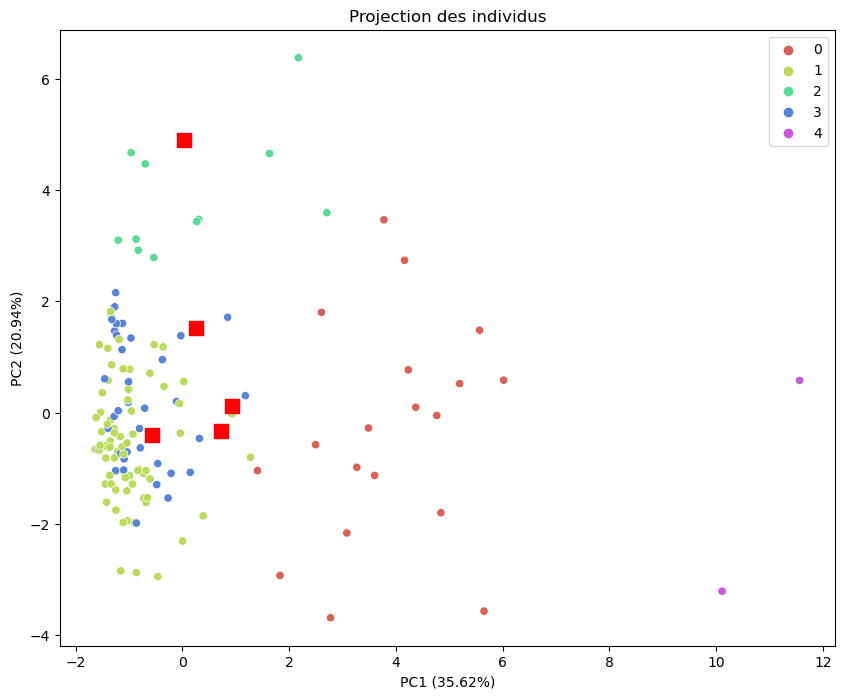

In [10]:
my_kmeans(df, 5)

### Boxplot par groupe

<AxesSubplot:xlabel='cluster', ylabel='Disponibilité de protéines en quantité (g/personne/jour)'>

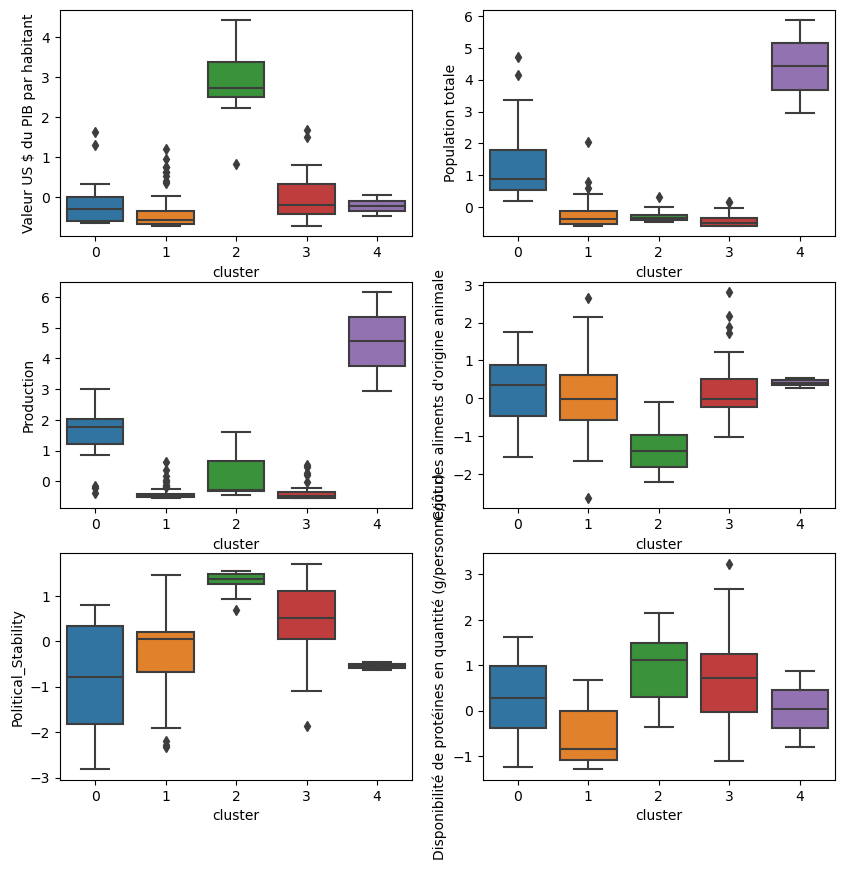

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df, x="cluster", y="Valeur US $ du PIB par habitant")

plt.subplot(322)
sns.boxplot(data=df, x="cluster", y="Population totale")

plt.subplot(323)
sns.boxplot(data=df, x="cluster", y="Production")

plt.subplot(324)
sns.boxplot(data=df, x="cluster", y="Coût des aliments d'origine animale")

plt.subplot(325)
sns.boxplot(data=df, x="cluster", y="Political_Stability")

plt.subplot(326)
sns.boxplot(data=df, x="cluster", y="Disponibilité de protéines en quantité (g/personne/jour)")

<AxesSubplot:xlabel='cluster', ylabel='Disponibilité de protéines en quantité (g/personne/jour)'>

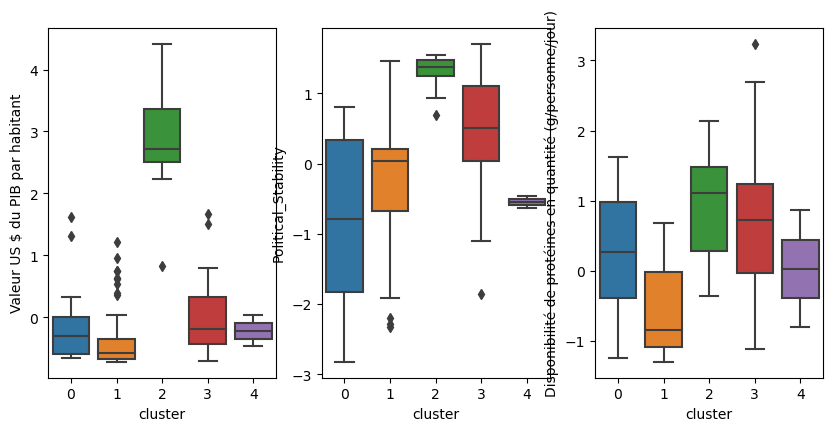

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(231)
sns.boxplot(data=df, x="cluster", y="Valeur US $ du PIB par habitant")

plt.subplot(232)
sns.boxplot(data=df, x="cluster", y="Political_Stability")

plt.subplot(233)
sns.boxplot(data=df, x="cluster", y="Disponibilité de protéines en quantité (g/personne/jour)")

In [13]:
df.loc[df["cluster"]==2]

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Valeur US $ du PIB par habitant,Coût d'une alimentation équilibré (PPP dollar par personne par jour),Coût des aliments d'origine animale,Population totale,Population urbaine,Part de l'élevage de poulet (%),Political_Stability,cluster
Zone,,,,,,,,,,,,,,,
Australie,2.142350,1.301110,-0.051785,-0.410048,1.375903,-0.358299,1.381891,3.470344,-2.008052,-2.205601,0.013091,0.399259,-0.828269,1.262378,2
Autriche,0.249748,-0.278680,0.152095,0.497266,-0.286673,-0.358299,-0.306336,2.714276,-0.981640,-1.395125,-0.372455,-0.361505,-0.631149,1.460375,2
Belgique,-0.356881,-0.311922,3.425510,2.697986,-0.312985,-0.358299,0.168054,2.473741,-0.801568,-0.695169,-0.309299,-0.069148,-0.592212,0.693138,2
Canada,1.573115,1.715844,0.633480,1.192230,1.806758,-0.358299,1.604779,2.538275,-0.799567,-0.584650,0.305165,0.819062,-0.401177,1.522249,2
Danemark,1.388218,-0.288178,0.497560,0.719268,-0.276806,-0.358299,-0.268686,3.493051,-1.773958,-1.995088,-0.447163,-0.363566,-0.737010,1.237629,2
Finlande,0.328693,-0.376823,-0.221685,-0.410048,-0.380409,-0.358299,-0.334950,2.646617,-1.435822,-1.758260,-0.452757,-0.378797,-0.584911,1.497499,2
Irlande,1.103600,-0.349913,0.237046,0.391091,-0.347519,-0.358299,-0.363564,4.418336,-1.731941,-1.863517,-0.470732,-0.460721,-0.882416,1.398501,2
Pays-Bas,0.455421,0.036328,7.740979,5.304101,0.019201,-0.358299,1.127377,2.837402,-1.039663,-1.384599,-0.167151,0.137152,-0.204666,1.299502,2
Portugal,1.340435,-0.038071,-0.040458,0.227002,-0.031778,-0.358299,0.014442,0.824509,-1.499848,-1.547747,-0.335591,-0.284925,-0.735793,1.546998,2


### ACP

Explained Variance Ratio : [36. 57. 67. 75.]


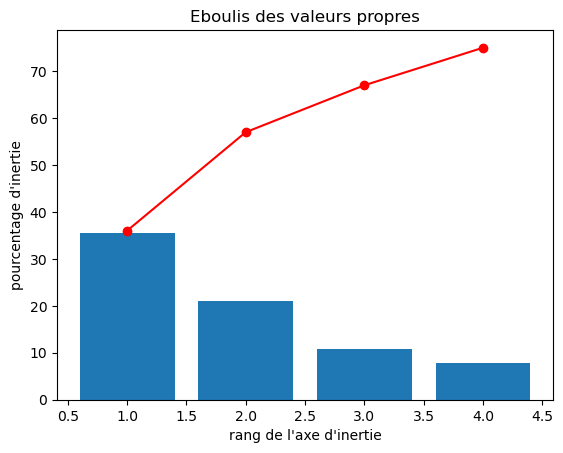

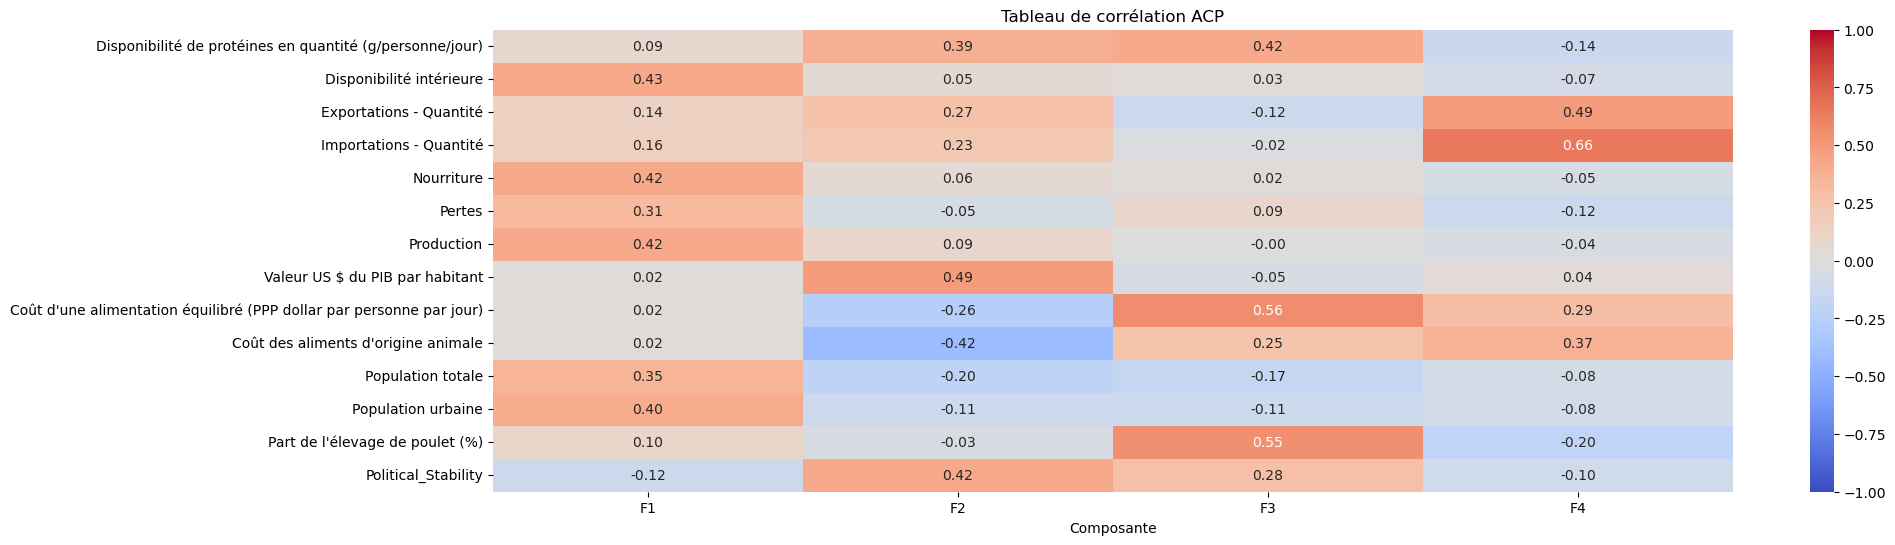

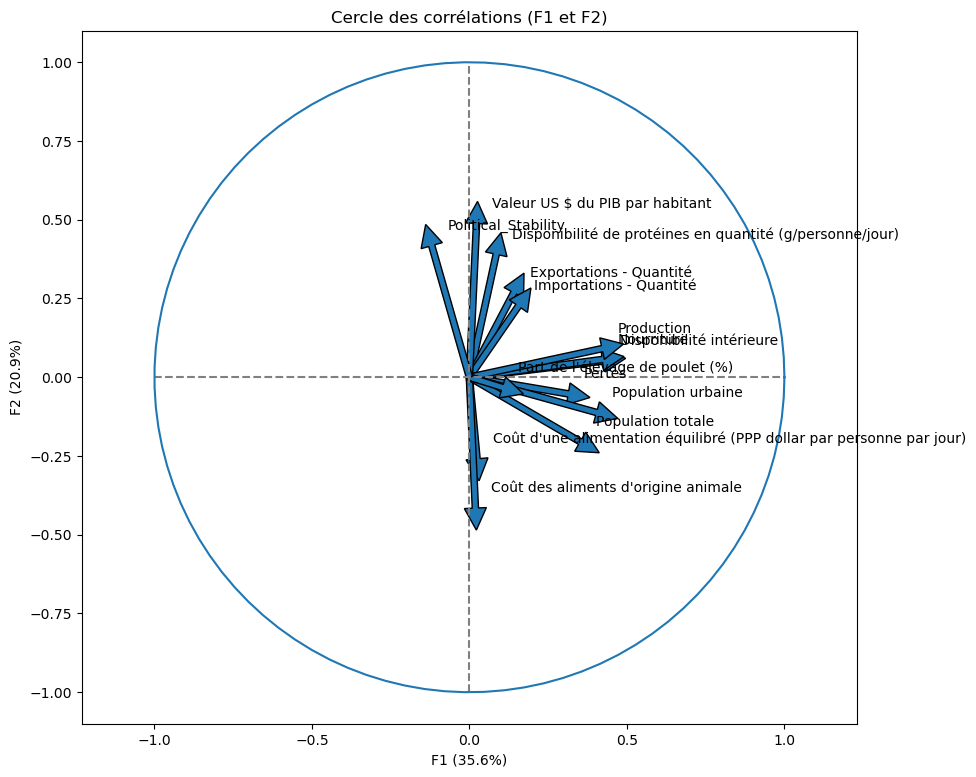

In [14]:
my_pca_proj(df, 4, (0,1), clusters=df["cluster"], sup_columns=["cluster"])

# Dendrogramme

In [15]:
df_2 = df.drop("cluster", axis=1)

Cluster 1: ['Bangladesh', 'Indonésie', 'Nigéria', 'Pakistan']
Cluster 2: ['Afrique du Sud', 'Argentine', 'Colombie', 'Espagne', 'Fédération de Russie', "Iran (République islamique d')", 'Iraq', 'Malaisie', 'Myanmar', 'Philippines', 'Pologne', 'Thaïlande', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte']
Cluster 3: ['Australie', 'Autriche', 'Belgique', 'Canada', 'Danemark', 'Finlande', 'Irlande', 'Italie', 'Pays-Bas', 'Suède', 'Émirats arabes unis']
Cluster 4: ['Antigua-et-Barbuda', 'Azerbaïdjan', 'Belize', 'Bélarus', 'Chili', 'Chypre', 'Cuba', 'Estonie', 'Grèce', 'Guatemala', 'Hongrie', 'Kazakhstan', 'Lettonie', 'Lituanie', 'Malte', 'Maroc', 'Nouvelle-Calédonie', 'Oman', 'Polynésie française', 'Portugal', 'Roumanie', 'République de Moldova', 'République-Unie de Tanzanie', 'Saint-Kitts-et-Nevis', 'Sainte-Lucie', 'Samoa', 'Slovaquie', 'Slovénie', 'Sénégal', 'Tchéquie', 'Uruguay', 'Équateur']
Cluster 5: ['Albanie', 'Algérie', 'Angola', 'Arménie', 'Barbade', 'Bolivie (État plurinational de)', '

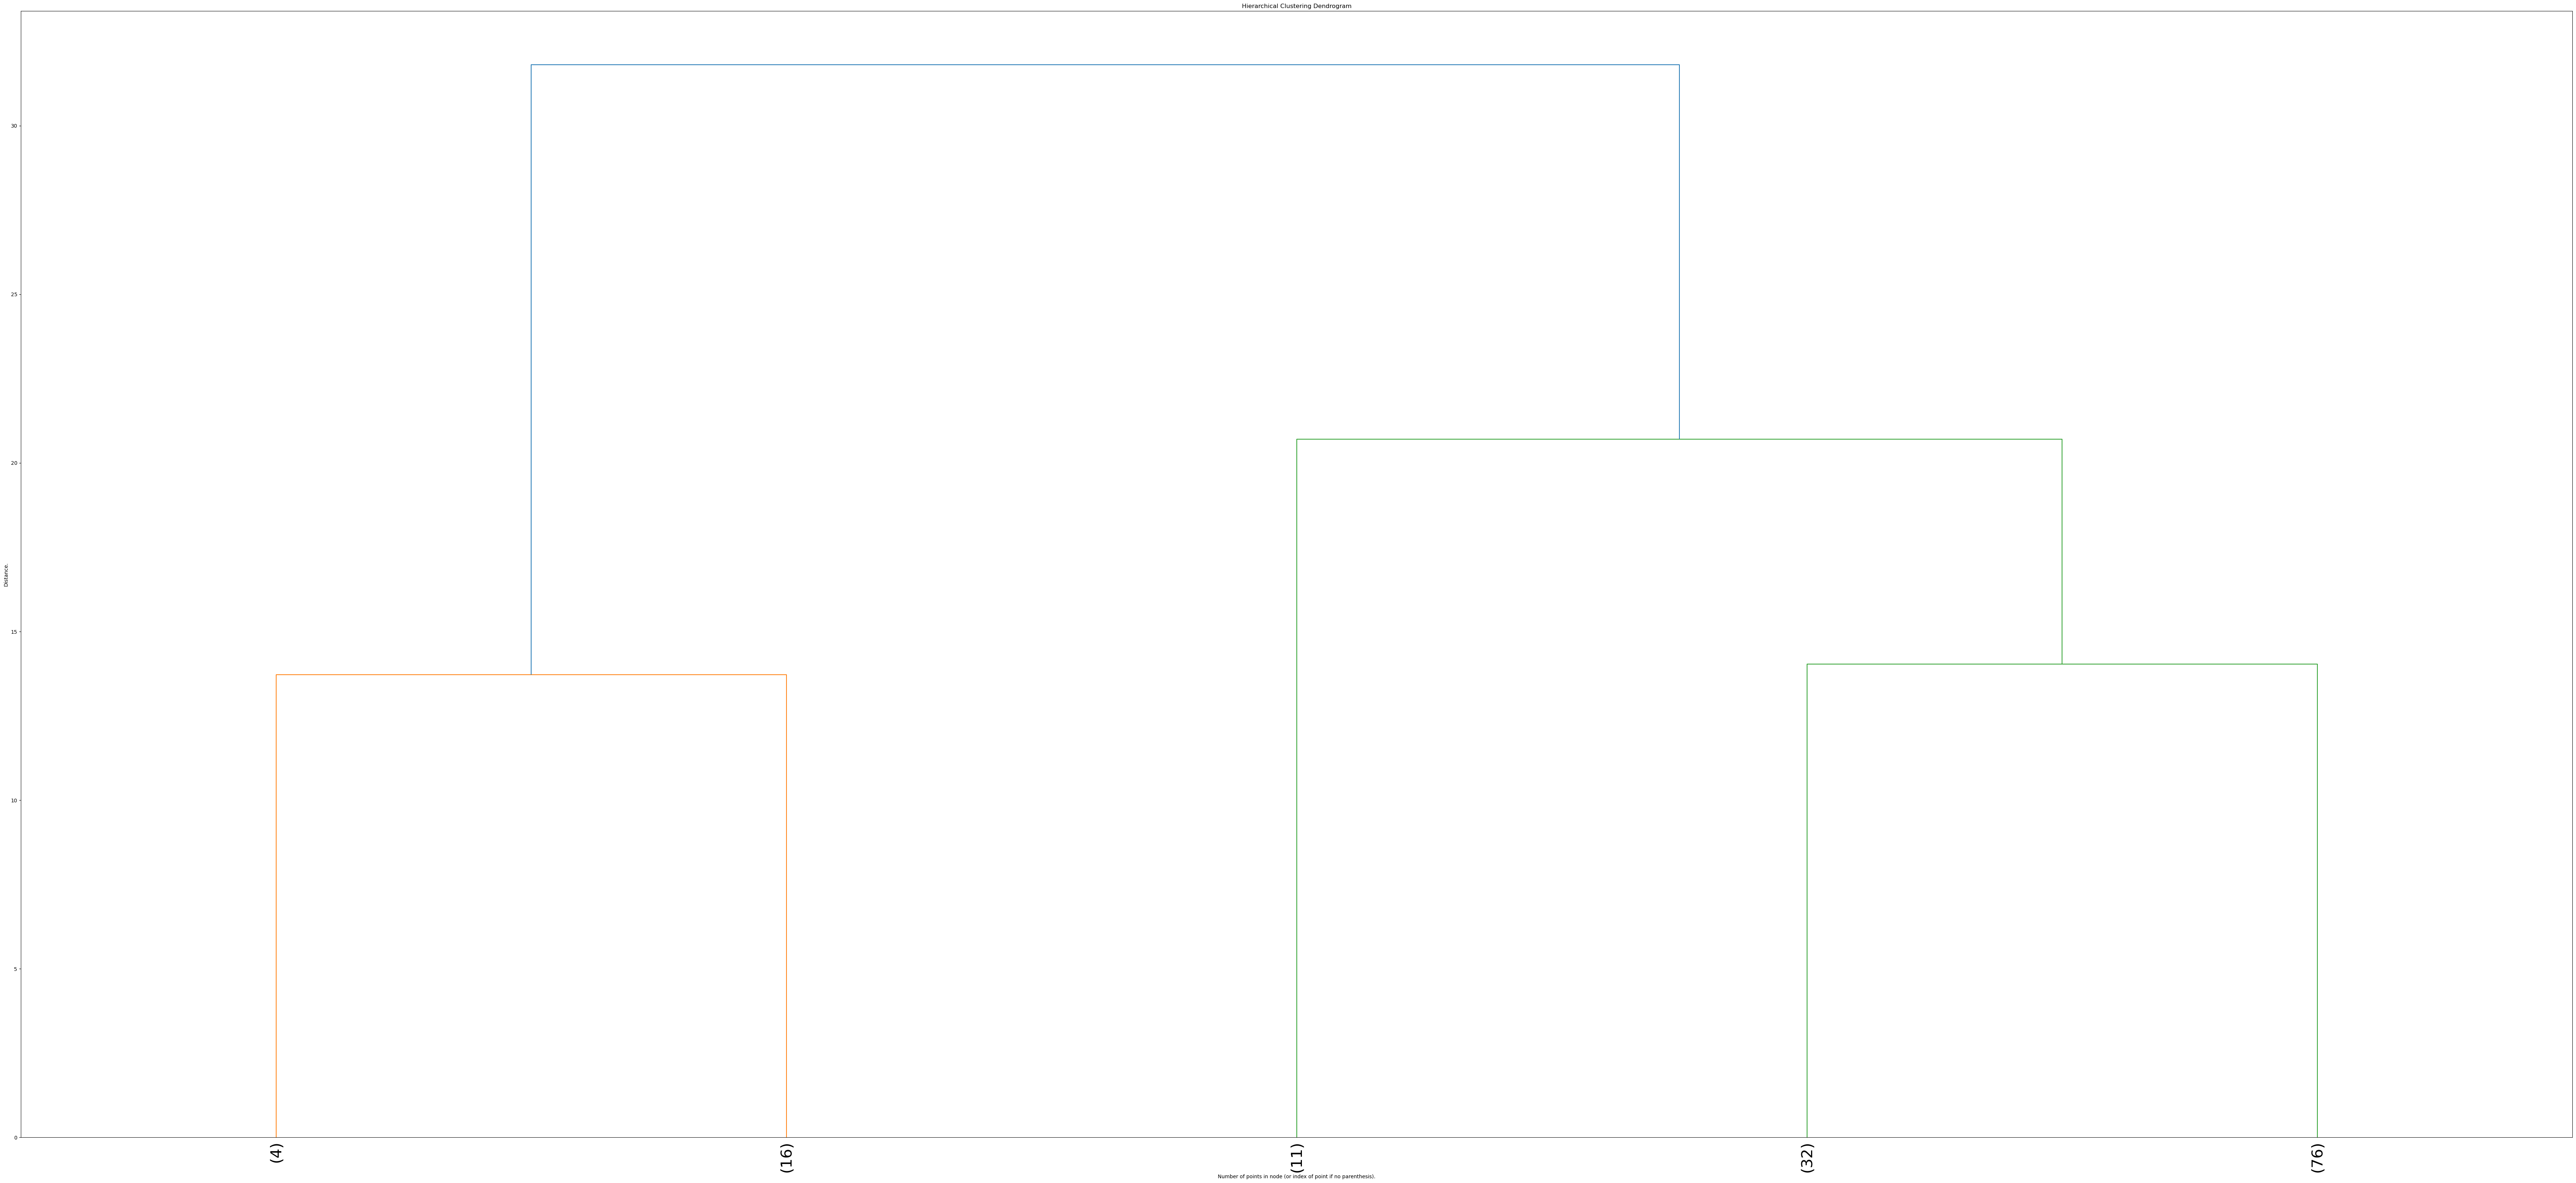

In [16]:
new_df = my_dendrogram(df_2, 5)

In [17]:
# Création des groupes suite au Dendrograme
df_groupe_1 = new_df.loc[new_df["Groupe"]==1]
df_groupe_2 = new_df.loc[new_df["Groupe"]==2]
df_groupe_3 = new_df.loc[new_df["Groupe"]==3]
df_groupe_4 = new_df.loc[new_df["Groupe"]==4]
df_groupe_5 = new_df.loc[new_df["Groupe"]==5]

<AxesSubplot:xlabel='Groupe', ylabel='Disponibilité de protéines en quantité (g/personne/jour)'>

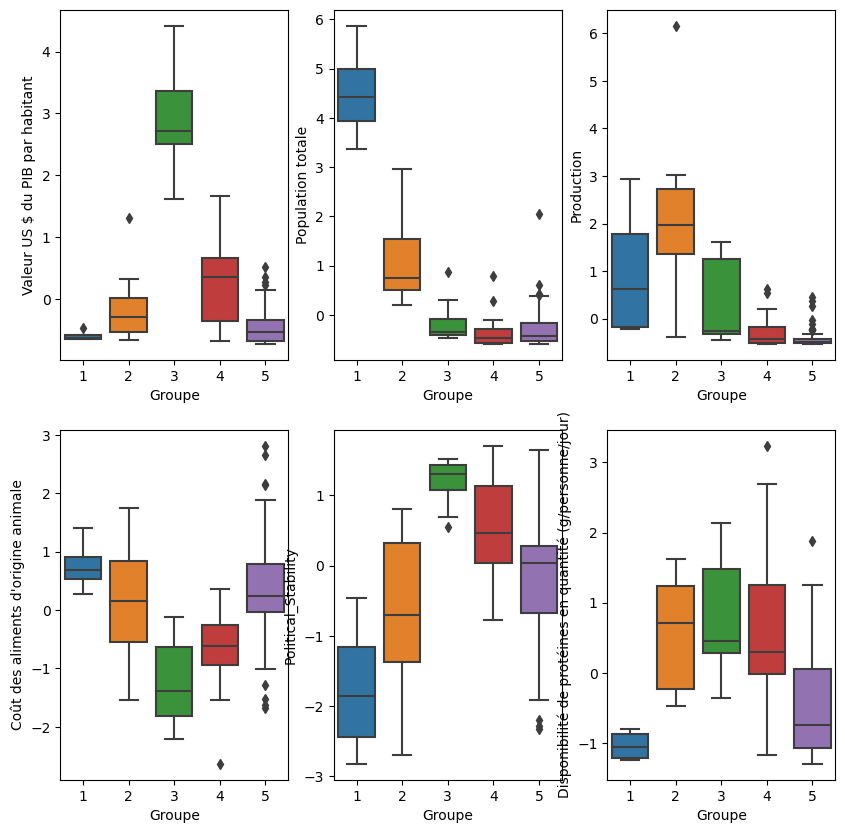

In [18]:
plt.figure(figsize=(10,10))

plt.subplot(231)
sns.boxplot(data=new_df, x="Groupe", y="Valeur US $ du PIB par habitant")

plt.subplot(232)
sns.boxplot(data=new_df, x="Groupe", y="Population totale")

plt.subplot(233)
sns.boxplot(data=new_df, x="Groupe", y="Production")

plt.subplot(234)
sns.boxplot(data=new_df, x="Groupe", y="Coût des aliments d'origine animale")

plt.subplot(235)
sns.boxplot(data=new_df, x="Groupe", y="Political_Stability")

plt.subplot(236)
sns.boxplot(data=new_df, x="Groupe", y="Disponibilité de protéines en quantité (g/personne/jour)")

<AxesSubplot:xlabel='Groupe', ylabel='Disponibilité de protéines en quantité (g/personne/jour)'>

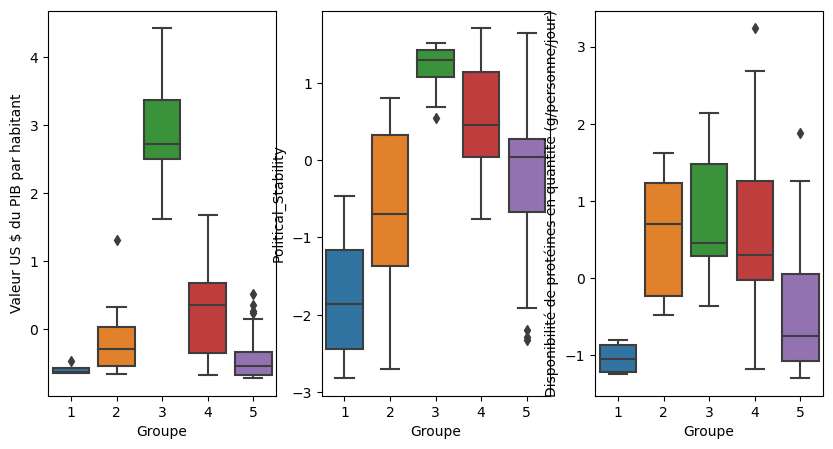

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(131)
sns.boxplot(data=new_df, x="Groupe", y="Valeur US $ du PIB par habitant")

plt.subplot(132)
sns.boxplot(data=new_df, x="Groupe", y="Political_Stability")

plt.subplot(133)
sns.boxplot(data=new_df, x="Groupe", y="Disponibilité de protéines en quantité (g/personne/jour)")

In [20]:
new_df.loc[new_df["Groupe"]==3]

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Valeur US $ du PIB par habitant,Coût d'une alimentation équilibré (PPP dollar par personne par jour),Coût des aliments d'origine animale,Population totale,Population urbaine,Part de l'élevage de poulet (%),Political_Stability,Groupe
7,Australie,2.142350,1.301110,-0.051785,-0.410048,1.375903,-0.358299,1.381891,3.470344,-2.008052,-2.205601,0.013091,0.399259,-0.828269,1.262378,3
8,Autriche,0.249748,-0.278680,0.152095,0.497266,-0.286673,-0.358299,-0.306336,2.714276,-0.981640,-1.395125,-0.372455,-0.361505,-0.631149,1.460375,3
12,Belgique,-0.356881,-0.311922,3.425510,2.697986,-0.312985,-0.358299,0.168054,2.473741,-0.801568,-0.695169,-0.309299,-0.069148,-0.592212,0.693138,3
24,Canada,1.573115,1.715844,0.633480,1.192230,1.806758,-0.358299,1.604779,2.538275,-0.799567,-0.584650,0.305165,0.819062,-0.401177,1.522249,3
34,Danemark,1.388218,-0.288178,0.497560,0.719268,-0.276806,-0.358299,-0.268686,3.493051,-1.773958,-1.995088,-0.447163,-0.363566,-0.737010,1.237629,3
42,Finlande,0.328693,-0.376823,-0.221685,-0.410048,-0.380409,-0.358299,-0.334950,2.646617,-1.435822,-1.758260,-0.452757,-0.378797,-0.584911,1.497499,3
58,Irlande,1.103600,-0.349913,0.237046,0.391091,-0.347519,-0.358299,-0.363564,4.418336,-1.731941,-1.863517,-0.470732,-0.460721,-0.882416,1.398501,3
59,Italie,0.320383,1.304275,0.746747,0.371786,1.334791,-0.358299,1.451167,1.617115,-0.755549,-0.521496,0.877635,1.384691,-0.137742,0.544640,3
94,Pays-Bas,0.455421,0.036328,7.740979,5.304101,0.019201,-0.358299,1.127377,2.837402,-1.039663,-1.384599,-0.167151,0.137152,-0.204666,1.299502,3
116,Suède,0.166648,-0.256518,-0.159389,0.246307,-0.280095,-0.358299,-0.292782,3.250002,-0.353388,-1.226715,-0.341678,-0.191386,-0.708415,1.373751,3
